## 1) Imports

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

## 2) Data

In [15]:
df = pd.read_csv("insurance_data.csv")

In [16]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


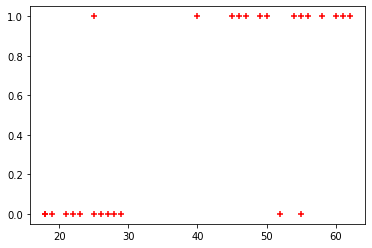

In [21]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [22]:
df.shape

(27, 2)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

## 3) Making Model

In [25]:
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

## 4) Printing weight and bias

In [27]:
print("Weight: ", model.coef_)

Weight:  [[0.12693065]]


In [30]:
print("Bias: ", model.intercept_)

Bias:  [-4.97705444]


## 5) Predicted values

In [32]:
y_pred = model.predict(x_test)

In [33]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [1 0 0]


## 6) Actual values and predicted values

In [35]:
df = pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred})
df.head()

,Actual_value,Predicted_value
23,1,1
19,0,0
20,0,0


In [37]:
model.score(x_test, y_test)

1.0

In [38]:
model.predict_proba(x_test)

array([[0.32413681, 0.67586319],
       [0.93657091, 0.06342909],
       [0.90982587, 0.09017413]])

## Another problem

In [39]:
df = pd.read_csv("HR_comma_sep.csv")

In [48]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data exploration and visualization

In [49]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [45]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [47]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [51]:
# average number for all columns
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

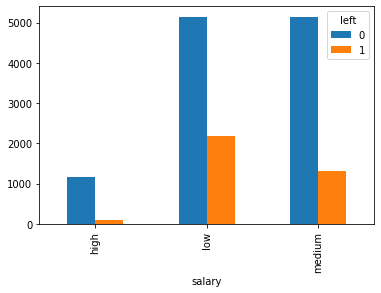

In [52]:
# Impact of salary on employee retention
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

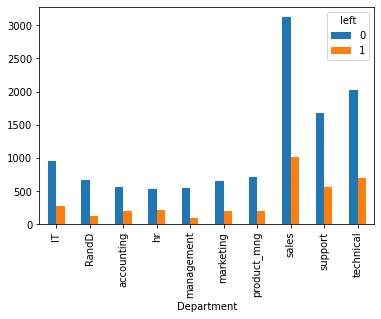

In [53]:
# Department wise employee retention rate
pd.crosstab(df.Department, df.left).plot(kind='bar')

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
- Satisfaction Level
- Average Monthly Hours
- Promotion Last 5 Years
- Salary


In [54]:
newdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.

In [56]:
salary_dummies = pd.get_dummies(newdf.salary, prefix="salary")

In [57]:
print(salary_dummies)

       salary_high  salary_low  salary_medium
0                0           1              0
1                0           0              1
2                0           0              1
3                0           1              0
4                0           1              0
...            ...         ...            ...
14994            0           1              0
14995            0           1              0
14996            0           1              0
14997            0           1              0
14998            0           1              0

[14999 rows x 3 columns]


In [58]:
finaldf = pd.concat([newdf,salary_dummies],axis='columns')

In [59]:
finaldf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [60]:
finaldf.drop("salary", axis="columns", inplace=True)

In [61]:
finaldf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [62]:
X = finaldf
Y = df.left

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11999, 6)
(11999,)
(3000, 6)
(3000,)


In [67]:
model.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_pred = model.predict(x_test)

In [69]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0 0 0 ... 1 0 0]


In [70]:
df = pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred})
df.head()

,Actual_value,Predicted_value
3678,0,0
9781,0,0
2422,0,0
674,1,0
7113,0,0


In [71]:
model.score(x_test, y_test)

0.7693333333333333

In [85]:
x_test[2998:-1]

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
3548,0.99,261,0,0,1,0


In [86]:
y_test[2998:-1]

3548    0
Name: left, dtype: int64

In [87]:
print(model.predict(x_test[2998:-1]))

[0]


In [93]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2120  161]
 [ 531  188]]
0.7693333333333333
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2281
           1       0.54      0.26      0.35       719

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000

